### Section 1: Getting Familiar With the Dataset

Before doing any analysis, I loaded the WineQT.csv file and took a look at the columns. The dataset has different chemical measurements for each wine sample along with a quality score from 0 to 10. 

The goal here was just to understand what I'm working with and check that the file loaded correctly.


In [3]:
# import pandas and other tools I need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the wine dataset
df = pd.read_csv("WineQT.csv")

# show the first few rows to make sure it's correct
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Checking Basic Info
Here I checked the dataset structure, the data types, and whether any columns were missing values. This helps figure out if the data needs cleaning before doing the analysis.


In [5]:
# shows column types and how many rows/columns there are
df.info()

# count missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Correlation Heatmap

To find which chemical features affect wine quality the most, I plotted a correlation heatmap. 
The darker/lighter colors show how strongly two variables move together.

After checking the heatmap, the three features that stood out the most related to quality were:

- **Alcohol** – this has the strongest positive impact on quality.
- **Sulphates** – also a positive relationship, but not as strong.
- **Volatile acidity** – this one is negative, meaning higher values usually lower the quality.

These had the clearest relationships compared to the rest of the data.

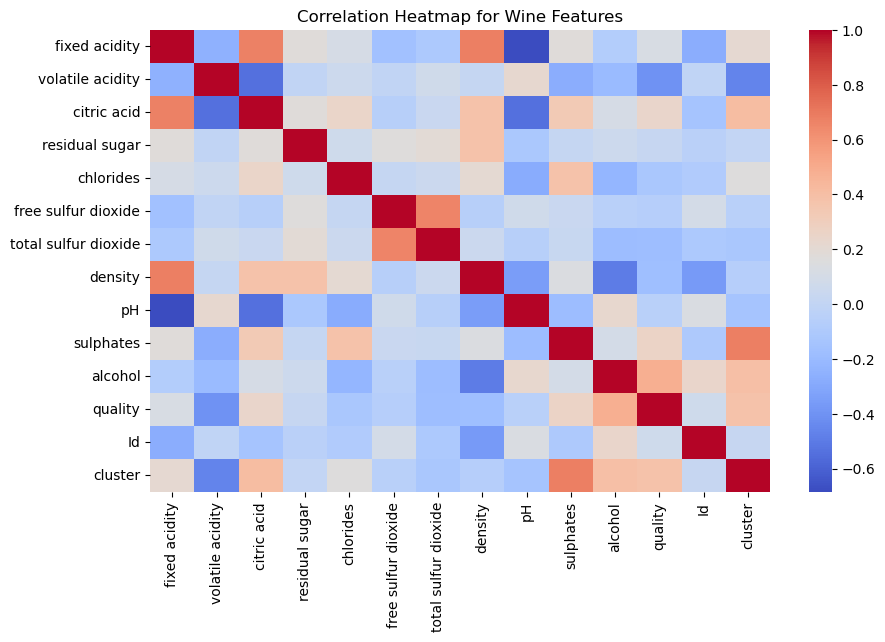

In [20]:
# make a correlation matrix of all features
corr = df.corr()

# draw the heatmap to see what relates to quality
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap for Wine Features")
plt.savefig("correlation_heatmap.png")
plt.show()

### Bar Plot: Average Alcohol Content vs Quality

For this plot, I compared the average alcohol level for each quality rating. I wanted to visually confirm if higher quality wines really have more alcohol, since the heatmap showed a strong positive relationship.

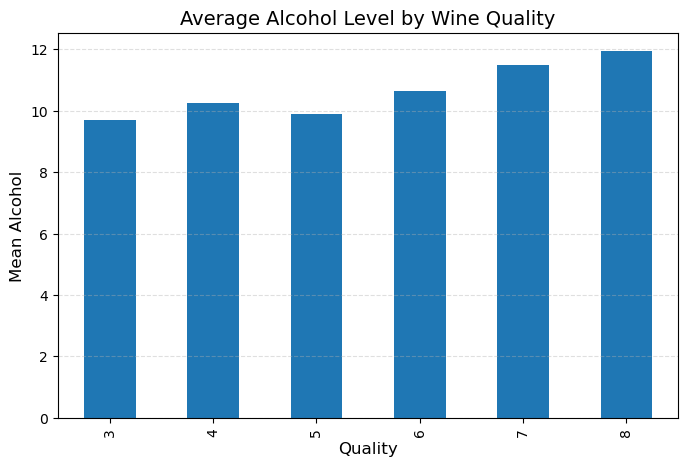

In [7]:
# get average alcohol for each quality score
avg_alcohol = df.groupby("quality")["alcohol"].mean()

# bar plot
plt.figure(figsize=(8,5))
avg_alcohol.plot(kind="bar")
plt.title("Average Alcohol Level by Wine Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Alcohol", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.savefig("barplot1_alcohol_quality.png")
plt.show()

### Bar Plot: Sulphates vs Wine Quality

Since sulphates were also positively correlated with quality, I made a bar plot to check how the averages change across different quality levels.


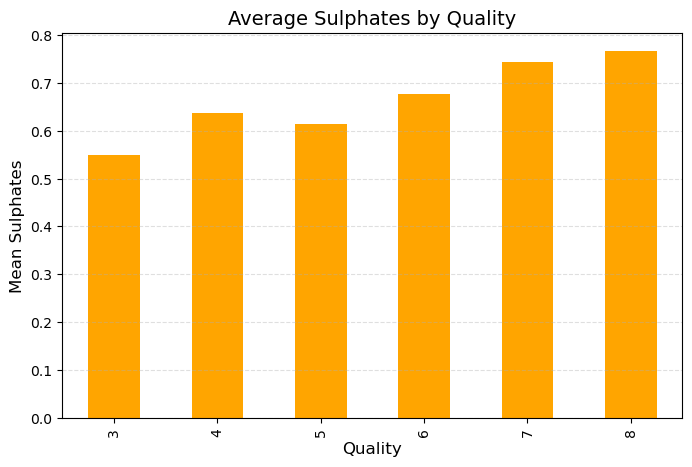

In [8]:
avg_sulphates = df.groupby("quality")["sulphates"].mean()

plt.figure(figsize=(8,5))
avg_sulphates.plot(kind="bar", color="orange")
plt.title("Average Sulphates by Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Sulphates", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.savefig("barplot2_sulphates_quality.png")
plt.show()

### Bar Plot: Volatile Acidity vs Quality

Volatile acidity had the strongest negative correlation. So in this plot I checked whether lower volatile acidity tends to match higher quality wines.

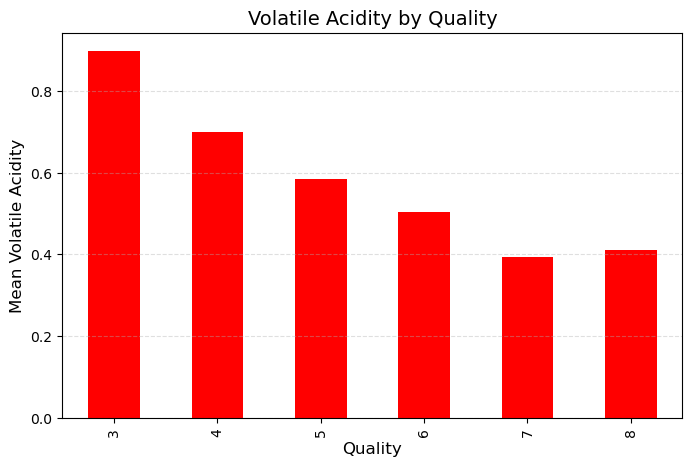

In [9]:
avg_va = df.groupby("quality")["volatile acidity"].mean()

plt.figure(figsize=(8,5))
avg_va.plot(kind="bar", color="red")
plt.title("Volatile Acidity by Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Volatile Acidity", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.savefig("barplot3_volatile_quality.png")
plt.show()

### Bar Plot: pH Levels Across Wine Quality

I also checked how pH varies with quality to see if acidity was related in any obvious way.

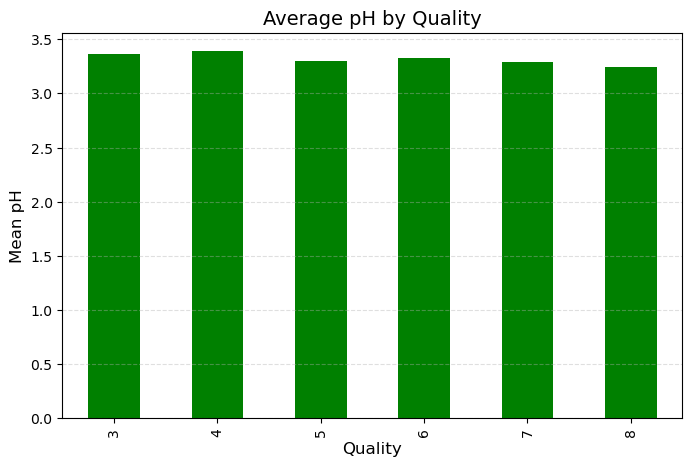

In [10]:
avg_ph = df.groupby("quality")["pH"].mean()

plt.figure(figsize=(8,5))
avg_ph.plot(kind="bar", color="green")
plt.title("Average pH by Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean pH", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.savefig("barplot4_ph_quality.png")
plt.show()

### Line Plot: Density vs Quality

Here I used a line plot to see how wine density changes across different quality ratings.

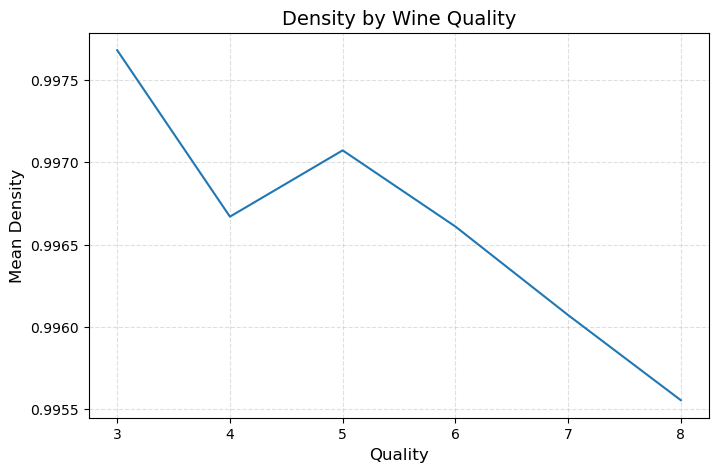

In [11]:
density_by_q = df.groupby("quality")["density"].mean()

plt.figure(figsize=(8,5))
plt.plot(density_by_q.index, density_by_q.values)
plt.title("Density by Wine Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Density", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("lineplot1_density_quality.png")
plt.show()

### Line Plot: Residual Sugar vs Quality

This plot shows how the amount of leftover sugar varies with wine quality.

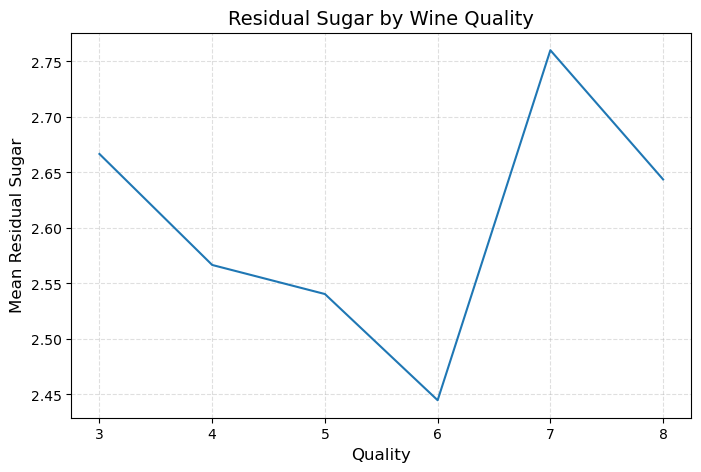

In [12]:
sugar_by_q = df.groupby("quality")["residual sugar"].mean()

plt.figure(figsize=(8,5))
plt.plot(sugar_by_q.index, sugar_by_q.values)
plt.title("Residual Sugar by Wine Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Residual Sugar", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("lineplot2_sugar_quality.png")
plt.show()

### Line Plot: Chlorides vs Quality

I plotted chlorides to see if saltiness affects the quality rating.

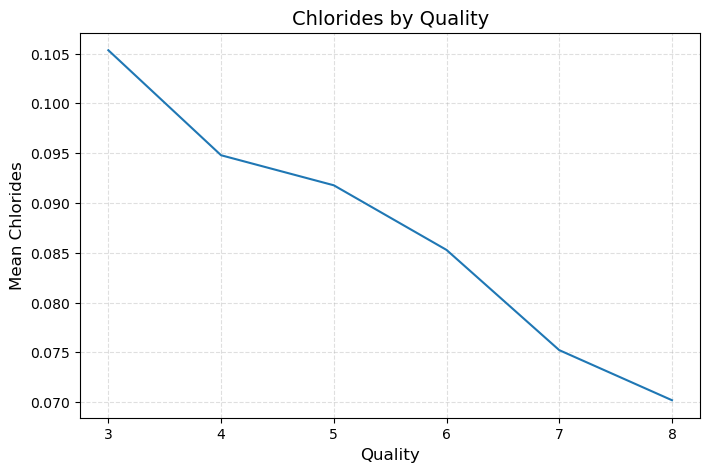

In [13]:
chl_by_q = df.groupby("quality")["chlorides"].mean()

plt.figure(figsize=(8,5))
plt.plot(chl_by_q.index, chl_by_q.values)
plt.title("Chlorides by Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Chlorides", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("lineplot3_chlorides_quality.png")
plt.show()

### Line Plot: Free Sulfur Dioxide vs Quality

This plot checks if preservative levels (SO2) line up with quality changes.

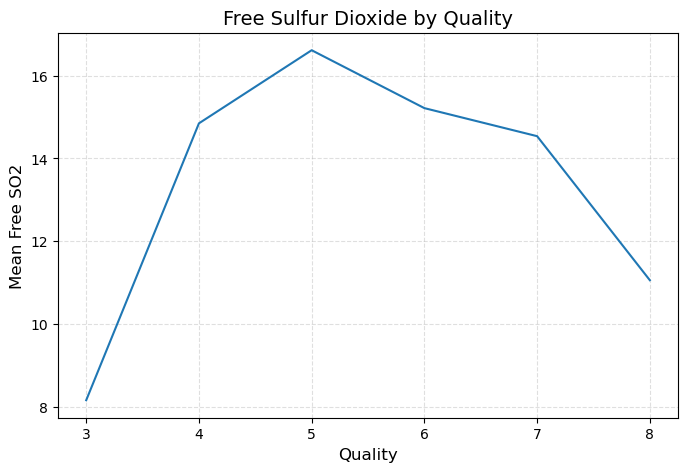

In [14]:
so2_by_q = df.groupby("quality")["free sulfur dioxide"].mean()

plt.figure(figsize=(8,5))
plt.plot(so2_by_q.index, so2_by_q.values)
plt.title("Free Sulfur Dioxide by Quality", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Mean Free SO2", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig("lineplot4_so2_quality.png")
plt.show()

## K-Means Clustering

In this part, I used K-Means to group the wines into clusters based on their chemical features. 
The idea is to see if wines naturally group together in a way that might relate to their quality. 
Since K-Means works better when the data is scaled, I standardized the features first. 
I used three features that seemed important from earlier: alcohol, sulphates, and volatile acidity.

In [15]:
# import the tools needed for K-Means and scaling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# pick a few features to cluster on
X = df[["alcohol", "sulphates", "volatile acidity"]]

# scale the data so K-Means works better
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pick number of clusters (k=3 for this lab)
kmeans = KMeans(n_clusters=3, random_state=42)

# run the algorithm
clusters = kmeans.fit_predict(X_scaled)

# add the cluster results back to the dataframe
df["cluster"] = clusters

# show the first few rows to check it worked
df[["alcohol", "sulphates", "volatile acidity", "cluster"]].head()

,alcohol,sulphates,volatile acidity,cluster
0,9.4,0.56,0.70,0
1,9.8,0.68,0.88,0
2,9.8,0.65,0.76,0
3,9.8,0.58,0.28,0
4,9.4,0.56,0.70,0


### Visualizing the Clusters

To see how the clusters look, I made a scatter plot using two of the features.
Alcohol and sulphates had the strongest positive relationship with quality, so I used them on the axes. 
Each point is colored based on the cluster K-Means assigned.

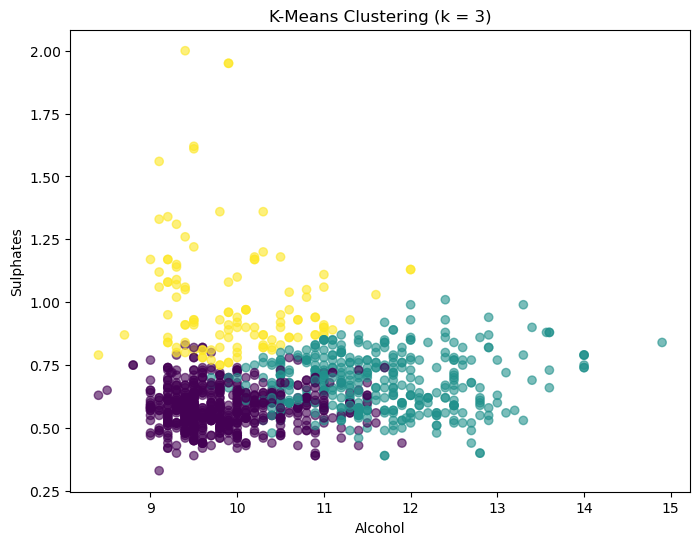

In [16]:
plt.figure(figsize=(8,6))

# scatter plot of clusters
plt.scatter(
    df["alcohol"], 
    df["sulphates"], 
    c=df["cluster"], 
    cmap="viridis", 
    alpha=0.6
)

# add labels and title
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.title("K-Means Clustering (k = 3)")

# save the image
plt.savefig("kmeans_clusters.png", dpi=300, bbox_inches='tight')

plt.show()

### K-Means Summary

Based on the plot, the wines get separated into three different groups. 
The clusters mostly split apart by alcohol level, and sulphates also helped separate the points. 
There is still some mixing between the clusters, which makes sense because wine quality depends on several factors, not just these two. 
But overall, K-Means was able to find a few natural patterns in the data.

## K-Nearest Neighbors (KNN) Classification

In this section, I used the KNN algorithm to predict the wine quality based on the chemical features. 
KNN works by comparing each wine to its closest neighbors and seeing what quality they have. 
Since the features are measured on different scales, I standardized them before training the model.

In [17]:
# imports for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# choose features for prediction
# (these were the most correlated with quality earlier)
features = ["alcohol", "sulphates", "volatile acidity"]
X = df[features]
y = df["quality"]

# split the dataset into training and testing sets
# test_size=0.2 means 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# scale the features so KNN can calculate distances fairly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# create a KNN model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# train the model
knn.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = knn.predict(X_test_scaled)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6200873362445415

### KNN Accuracy

The accuracy score shows how well KNN was able to predict the wine quality. 
KNN usually struggles a bit on wine data because several quality values are really close to each other. 
So even if the accuracy isn't super high, it's still reasonable for this kind of dataset.

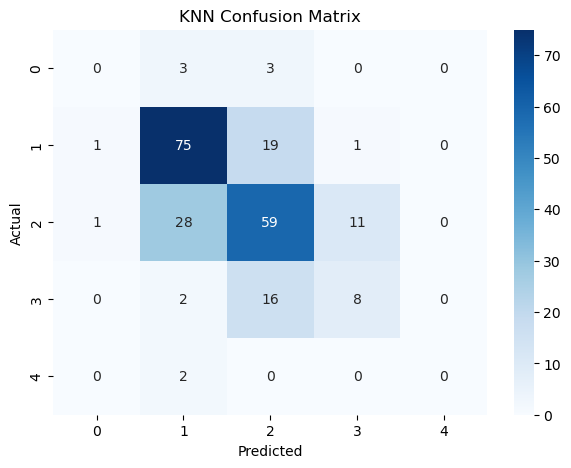

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# make the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot it
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# save the figure
plt.savefig("knn_confusion_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

### Confusion Matrix Summary

The confusion matrix shows how many predictions the model got right and where it made mistakes. 
Most of the predictions fall close to the diagonal, which means KNN was usually predicting values that were close to the actual quality. 
There is some mixing between nearby quality scores, which makes sense since the ratings don’t differ by much.

## Conclusion - Takeaway

This lab helped me get a better understanding of how different chemical features relate to wine quality and how machine learning models handle this kind of data. From the correlation heatmap, alcohol, sulphates, and volatile acidity were the most important features, which matched what I saw later in the bar and line plots. These visualizations showed that higher-quality wines tend to have higher alcohol and sulphates, while volatile acidity usually lowers the quality score.

For the unsupervised part, K-Means was able to split the wines into a few groups that made sense based on the features I used. The clusters weren’t perfect, but there was still some structure in the data. For the supervised part, the KNN classifier was able to predict wine quality with moderate accuracy. The confusion matrix showed that most of the mistakes were between nearby quality ratings, which is expected since the scores are pretty close to each other.

Overall, this lab showed how both visualization and machine learning can help make sense of real-world datasets. It also helped reinforce how important scaling, feature selection, and evaluation tools are when working with data.